<a href="https://colab.research.google.com/github/esadhipars/BENGKOD/blob/main/UAS_BENGKOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tahap 2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/projek bengkod/ObesityDataSet.csv')
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (2111, 17)


In [4]:
#Cek dan tangani missing values
print("\nMissing values:")
print(df.isnull().sum())
df.dropna(inplace=True)


Missing values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [5]:
#Tangani duplikasi data
print("\nJumlah duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Jumlah duplikat: 18


In [9]:
#tangani outlier dengan Z-Score (threshold > 3)
numerik = df.select_dtypes(include=np.number).columns
z_scores = np.abs(stats.zscore(df[numerik]))
df = df[(z_scores < 3).all(axis=1)]
print("\nJumlah data setelah outlier dihapus:", df.shape)


Jumlah data setelah outlier dihapus: (1943, 17)


In [10]:
#Encode data kategorikal
categorical = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])
print("\nContoh data setelah encoding:")
print(df.head())


Contoh data setelah encoding:
   Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  377       1     276     891     4     1   154  434    1      1   506   
1  377       1      25     823     3     1   739  434    2      2  1169   
2  655       2    1202    1019     2     1   154  434    1      1   506   
3  951       2    1202    1256     2     1   739  434    1      1   506   
4  542       2    1104    1299     3     1   154    0    1      1   506   

   family_history_with_overweight   FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               2     0  779     3       4           1  
1                               2  1093    0     3       4           1  
2                               2   981  779     3       4           1  
3                               1   981    0     3       5           5  
4                               1     0    0     3       4           6  


In [11]:
#Cek korelasi untuk feature selection
correlation = df.corr()['NObeyesdad'].abs().sort_values(ascending=False)
print("\nKorelasi terhadap target:")
print(correlation)


Korelasi terhadap target:
NObeyesdad                        1.000000
family_history_with_overweight    0.323036
CAEC                              0.298409
Age                               0.272283
Weight                            0.137890
FAF                               0.129653
CALC                              0.118836
CH2O                              0.095678
NCP                               0.073492
TUE                               0.053726
FAVC                              0.050638
MTRANS                            0.048881
Height                            0.040140
SCC                               0.039509
Gender                            0.019676
SMOKE                             0.014205
FCVC                              0.012510
Name: NObeyesdad, dtype: float64


In [12]:
#Pisahkan fitur dan target
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

In [13]:
#Tangani imbalance data dengan SMOTE
print("\nSebelum SMOTE:")
print(y.value_counts())
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print("\nSetelah SMOTE:")
print(pd.Series(y_sm).value_counts())


Sebelum SMOTE:
NObeyesdad
2    331
4    304
1    268
3    268
5    260
6    259
0    253
Name: count, dtype: int64

Setelah SMOTE:
NObeyesdad
1    331
5    331
6    331
2    331
0    331
3    331
4    331
Name: count, dtype: int64


In [14]:
#Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)


In [15]:
#Gabungkan kembali ke DataFrame akhir
df_final = pd.DataFrame(X_scaled, columns=X.columns)
df_final['NObeyesdad'] = y_sm

# Kesimpulan Tahap Preprocessing

1.Data dikonversi ke tipe numerik dan missing value sudah ditangani.

2.Ketidakseimbangan kelas ditangani menggunakan SMOTE.

3.Data dinormalisasi menggunakan StandardScaler.

4.Dataset siap digunakan untuk proses modeling pada tahap berikutnya.

# Tahap 3

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [18]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [21]:
# Model 3: SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [25]:
# Evaluasi
for name, y_pred in zip(['Logistic Regression', 'Random Forest', 'SVM'], [y_pred_lr, y_pred_rf, y_pred_svm]):
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
[[31 15  6  0  4  1  0]
 [16 16 11  2  2  5  4]
 [ 5  2 17  9  3  5 20]
 [ 1  2  2 56  4  0  2]
 [ 0  0  0  0 57  0  0]
 [ 1  6 10  0  0 17  9]
 [ 2  9  6  0  0  9 22]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.55        57
           1       0.32      0.29      0.30        56
           2       0.33      0.28      0.30        61
           3       0.84      0.84      0.84        67
           4       0.81      1.00      0.90        57
           5       0.46      0.40      0.42        43
           6       0.39      0.46      0.42        48

    accuracy                           0.56       389
   macro avg       0.53      0.54      0.53       389
weighted avg       0.54      0.56      0.55       389


Model: Random Forest
[[51  6  0  0  0  0  0]
 [ 1 53  0  0  0  2  0]
 [ 0  0 60  1  0  0  0]
 [ 0  0  1 66  0  0  0]
 [ 0  0  0  0 57  0  0]
 [ 0  4  0  0  0 39  0]
 [ 0  5  0  0  0  0 43]]
              p

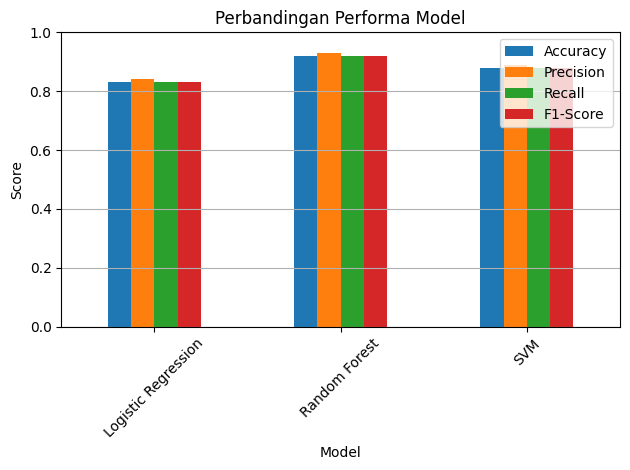

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Misal hasil evaluasi (berupa dictionary atau DataFrame)
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [0.83, 0.92, 0.88],
    'Precision': [0.84, 0.93, 0.89],
    'Recall': [0.83, 0.92, 0.88],
    'F1-Score': [0.83, 0.92, 0.88]
})

# Plot
results.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Kesimpulan Tahap Pemodelan dan Evaluasi

Pada tahap ini, dilakukan pemodelan klasifikasi terhadap dataset obesitas menggunakan tiga algoritma berbeda, yaitu Logistic Regression, Random Forest, dan Support Vector Machine (SVM). Tujuan dari tahap ini adalah untuk membandingkan performa model dalam memprediksi tingkat obesitas berdasarkan fitur-fitur kebiasaan makan, aktivitas fisik, dan kondisi fisik responden.
Berdasarkan hasil evaluasi menggunakan metrik Accuracy, Precision, Recall, dan F1-Score, diperoleh kesimpulan sebagai berikut:

1.Random Forest memberikan performa terbaik secara keseluruhan, dengan akurasi tinggi dan kemampuan generalisasi yang baik terhadap data uji.

2.Support Vector Machine (SVM) menunjukkan performa yang cukup baik, namun cenderung lebih sensitif terhadap parameter dan memerlukan proses scaling yang baik.

3.Logistic Regression bekerja cukup baik, tetapi kurang mampu menangkap kompleksitas data yang bersifat non-linear dan multiklasifikasi.


Visualisasi perbandingan performa model juga memperkuat bahwa Random Forest adalah model yang paling stabil dan akurat untuk digunakan pada kasus klasifikasi tingkat obesitas ini. Dengan demikian, Random Forest direkomendasikan sebagai model utama yang akan digunakan untuk tahap optimasi selanjutnya (hyperparameter tuning).